In [39]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# For the stuckness summary by learner data 
# The current dataset being pulled is a subset who exhibited learning behavior 
# Out of the  total learners who worked on more than 1 exercise, 
# about 82% exhibited some signs of learning,
# where an exercise had both correct and incorrect responses. Out of the 18%  remaining sessions,  
# 15% mastered some exercises immediately and 12% never got unstuck out of some exercises. 
# Only 5% mastered all their exercises and 2% were stuck on all their exercises. 

stuck = pd.read_csv('~/cahl_output/summarize_stuckness_bylearner_problemtype.csv')


In [40]:
stuck.head()

,sha_id,total_problems,never_stuck_problems,never_unstuck_problems,unstuck_problems,reattempted_stuck_problems,unstuck_different_exercise,unstuck_remediation_problems,unstuck_correct_remdiation_problems,unstuck_prereq_avail_problems,unstuck_is_prereq_match_problems,unstuck_is_topic_tree_avail_problems,unstuck_is_not_unit_match_problems,unstuck_is_not_lesson_match_problems,unstuck_topic_tree_avail_remediation_items,unstuck_unit_match_remediation_items,unstuck_lesson_match_remediation_items
0,sha_id,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0001R22gGbvLqg5+mSbv7kpiOjFTLE7eddHYSfaqMA8=,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0002PRyVGO/PD9Tj3S7W79JCi0otKMSfCI3RGFv0GJo=,8,4,4,0,2,0,0,0,0,0,0,0,0,0,0,0
3,0005vOGB8+M9AXMwj/abTgxySeBzy2cazO6p1H8C/VM=,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00068D7jsV0viktfuth2oNk8P8nSh04m70ODvozWAH0=,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Find stats for those who exhibited learning: i.e.,
# How many learners never get stuck
# How many learner 
# How many learners ever get stuck?



output_metrics = {
    '01-total learners ':{
            'total learners': stuck['sha_id'].count(),
            'total problems': '-'
            },
    '02-tried a problems':{
            'total learners': sum(stuck['total_problems']>0),
            'total problems': stuck['total_problems'].sum()
            },
    '03-immediately mastered a problem ':{
            'total learners': sum(stuck['never_stuck_problems']>0),
            'total problems': stuck['never_stuck_problems'].sum() 
            },
    '04-got stuck ever':{
            'total learners': sum((stuck['never_unstuck_problems']>0)|(stuck['unstuck_problems']>0)),
            'total problems': stuck['never_unstuck_problems'].sum() + stuck['unstuck_problems'].sum() 
            },
    '05-unable to unstuck':{
            'total learners': sum(stuck['never_unstuck_problems']>0),
            'total problems':  stuck['never_unstuck_problems'].sum()
            },
    '06-attempted to unstuck':{
            'total learners':sum(stuck['reattempted_stuck_problems']>0),
            'total problems': stuck['reattempted_stuck_problems'].sum()
            },    
    '07-able to unstuck':{
            'total learners':sum(stuck['unstuck_problems']>0),
            'total problems': stuck['unstuck_problems'].sum()
            },    
    '08-unstuck exercise have prereq available':{
            'total learners':sum(stuck['unstuck_prereq_avail_problems']>0),
            'total problems': stuck['unstuck_prereq_avail_problems'].sum()
            },   
    '09-prereq for unstuck exercise matches prereq':{
            'total learners':sum(stuck['unstuck_is_prereq_match_problems']>0),
            'total problems': stuck['unstuck_is_prereq_match_problems'].sum()
            },
    '10-unstuck remediation problems for unstuck exercise':{
            'total learners':sum(stuck['unstuck_remediation_problems']>0),
            'total problems': stuck['unstuck_remediation_problems'].sum()
            },      
    '11-unstuck remediation problems different exercise as stuck exercise':{
            'total learners':sum(stuck['unstuck_different_exercise']>0),
            'total problems': stuck['unstuck_different_exercise'].sum()
            },  
    '12-unstuck remediation problems answered correctly':{
            'total learners':sum(stuck['unstuck_correct_remdiation_problems']>0),
            'total problems': stuck['unstuck_correct_remdiation_problems'].sum()
            },    
    '13-unstuck remediation exericse in topic tree':{
            'total learners':sum(stuck['unstuck_is_topic_tree_avail_problems']>0),
            'total problems': stuck['unstuck_is_topic_tree_avail_problems'].sum()
            },    
    '14-unstuck remediation at least one not in same unit':{
            'total learners':sum(stuck['unstuck_is_not_unit_match_problems']>0),
            'total problems': stuck['unstuck_is_not_unit_match_problems'].sum()
            },    
    '15-unstuck remediation exercise at least one not in same lesson':{
            'total learners':sum(stuck['unstuck_is_not_lesson_match_problems']>0),
            'total problems': stuck['unstuck_is_not_lesson_match_problems'].sum()
            },
    '16-unstuck remediation problems for exercises in topic tree':{
            'total learners':sum(stuck['unstuck_topic_tree_avail_remediation_items']>0),
            'total problems': stuck['unstuck_topic_tree_avail_remediation_items'].sum()
            },    
    '17-unstuck remediation problems in same unit':{
            'total learners':sum(stuck['unstuck_unit_match_remediation_items']>0),
            'total problems': stuck['unstuck_unit_match_remediation_items'].sum()
            },    
    '18-unstuck remediation problems in same lesson':{
            'total learners':sum(stuck['unstuck_lesson_match_remediation_items']>0),
            'total problems': stuck['unstuck_lesson_match_remediation_items'].sum()
            }  
}

output = pd.DataFrame(columns = ['metric','total learners','total problems'])

for metric in sorted(output_metrics.keys()):
    output = output.append({'metric': metric,
                           'total learners': output_metrics[metric]['total learners'],
                           'total problems': output_metrics[metric]['total problems']},
                          ignore_index = True)

print('Summary of Metrics:')
print(output)
output.to_csv('summary_of_metrics.csv')
# stored here
# https://docs.google.com/spreadsheets/d/12qtEK-M36oz_ZLam6KveuWQniH6YYoZkOiqA17x3tqA/edit#gid=0

Summary of Metrics:
                                               metric total learners  \
0                                  01-total learners           17775   
1                                 02-tried a problems          17389   
2                  03-immediately mastered a problem           15649   
3                                   04-got stuck ever          15298   
4                                05-unable to unstuck          13718   
5                             06-attempted to unstuck          12569   
6                                  07-able to unstuck           9832   
7           08-unstuck exercise have prereq available           9563   
8       09-prereq for unstuck exercise matches prereq           3349   
9   10-unstuck remediation problems for unstuck ex...           9292   
10  11-unstuck remediation problems different exer...           4914   
11  12-unstuck remediation problems answered corre...           8938   
12      13-unstuck remediation exericse in t

Histogram of Perc Stuck Problems Out of Total Problems:


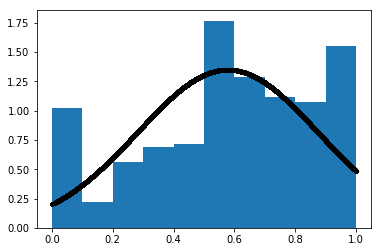

Distribution of % problems mastered immediately
59.66593806081868
23.924188666302015
12.442411846027351


In [28]:
# distribution of mastery  
print('Histogram of Perc Stuck Problems Out of Total Problems:')
stuck_with_problems = stuck[stuck['total_problems']>0]
perc_never_stuck =(stuck_with_problems['never_stuck_problems'])/stuck_with_problems['total_problems']

stuck_norm_fit = stats.norm.pdf( perc_never_stuck, np.mean(perc_never_stuck), np.std(perc_never_stuck))
plt.plot(perc_never_stuck, stuck_norm_fit,'.', color = 'black')
plt.hist(perc_never_stuck, density=True)
plt.show()

print('Distribution of % problems mastered immediately')
print( sum(perc_never_stuck>0.5)*100/len(perc_never_stuck)) # '%d immediately master over 50% skills' %
print(sum(perc_never_stuck>0.8)*100/len(perc_never_stuck)) # '%d immediately master over 80% of skills'
print(sum(perc_never_stuck<0.2)*100/len(perc_never_stuck)) #  '%d get stuck on 80% of skills'

Histogram of Perc Unstuck Problems Out of Total Stuck:


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


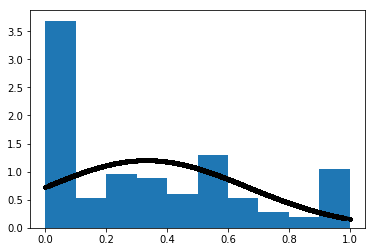

Distribution % who unstuck from stuck problems 
25.07383101146551
11.649574198008592
42.13434575197106


In [29]:
plt.close()
print('Histogram of Perc Unstuck Problems Out of Total Stuck:')
unstuck_with_problems = stuck[(stuck['never_unstuck_problems']>0) |
                           (stuck['unstuck_problems']>0)]
perc_unstuck = unstuck_with_problems['unstuck_problems']/(unstuck_with_problems['never_unstuck_problems'] +
                           unstuck_with_problems['unstuck_problems'])

unstuck_norm_fit = stats.norm.pdf( perc_unstuck, np.mean(perc_unstuck), np.std(perc_unstuck))
plt.plot(perc_unstuck, unstuck_norm_fit,'.', color = 'black')
plt.hist(perc_unstuck, normed=True)
plt.show()

print('Distribution % who unstuck from stuck problems ')
print( sum(perc_unstuck>0.5)*100/len(perc_unstuck)) # '%d unstuck at least 50% of their stuck skills' %
print(sum(perc_unstuck>0.8)*100/len(perc_unstuck)) # '%d unstuck over 80% of stuck skills'
print(sum(perc_unstuck<0.2)*100/len(perc_unstuck)) #  '%d never unstuck on 80% of skills'

Histogram of Problems worked on to unstuck:


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


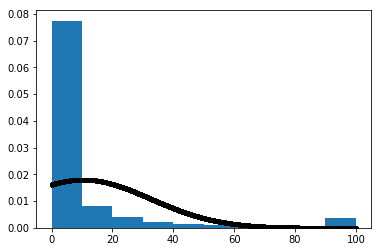

56.55955218300627
68.10628874250104
77.42409831869884
17.315677282571084


In [38]:
plt.close()
print('Histogram of Problems worked on to unstuck:')
unstuck_problems = stuck[(stuck['never_unstuck_problems']>0)]
num_unstuck_problems = unstuck_problems['unstuck_remediation_problems']/unstuck_problems['never_unstuck_problems']
# cap to 100
num_unstuck_problems[num_unstuck_problems>100] =100

unstuck_problems_norm_fit = stats.norm.pdf( num_unstuck_problems, np.mean(num_unstuck_problems), np.std(num_unstuck_problems))
plt.plot(num_unstuck_problems, unstuck_problems_norm_fit,'.', color = 'black')
plt.hist(num_unstuck_problems, normed=True)
plt.show()

print( sum(num_unstuck_problems<2)*100/len(num_unstuck_problems)) # '%d work on less than 2 problems' %
print( sum(num_unstuck_problems<5)*100/len(num_unstuck_problems)) # '%d work on less than 5 problems' %
print( sum(num_unstuck_problems<10)*100/len(num_unstuck_problems)) # '%d work on less than 10 problems' %
print( sum(num_unstuck_problems>15)*100/len(num_unstuck_problems)) # '%d work on less than 15 problems' %

